### Používám dataset Salary_data (https://www.kaggle.com/datasets/mohithsairamreddy/salary-data)

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("Salary_data.csv")
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## Roky praxe vs Plat

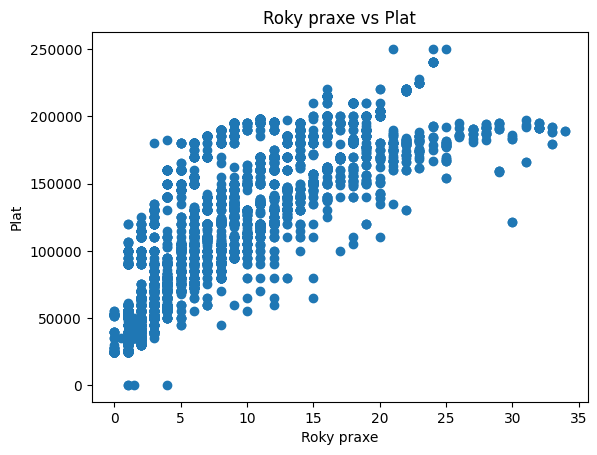

In [82]:
plt.scatter(data["Years of Experience"], data["Salary"])
plt.xlabel("Roky praxe")
plt.ylabel("Plat")
plt.title("Roky praxe vs Plat")
plt.show()

Z grafu můžeme vyčíst, že roky praxe a plat spolu korelují. Nejvyšší platy získávají lidé už od 21 let praxe.

# Distribuce platů

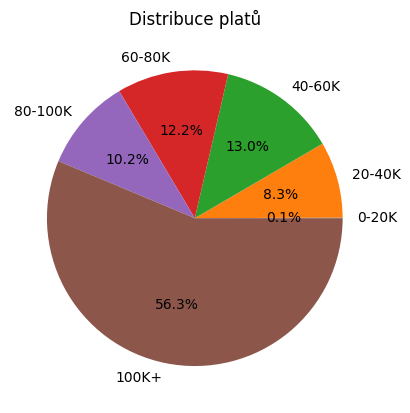

In [83]:
salary_ranges = ["0-20K", "20-40K", "40-60K", "60-80K", "80-100K", "100K+"]
salary_counts = pd.cut(data["Salary"], bins=[0, 20000, 40000, 60000, 80000, 100000, float("inf")], labels=salary_ranges)
salary_counts = salary_counts.value_counts().reindex(salary_ranges)
plt.pie(salary_counts, labels=salary_counts.index, autopct="%1.1f%%")
plt.title("Distribuce platů")
plt.show()

Z grafu můžeme vyčíst, že více jak polovina lidí z datasetu má plat přes 100 tisíc dolarů ročně. A kolem 21 % lidí má plat 0 až 60 tisíc dolarů.

## Korelační mapa

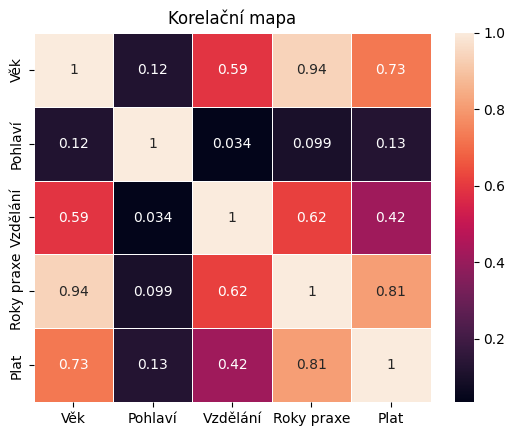

In [91]:
if isinstance(data["Gender"][0], str):
    data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})
if isinstance(data["Education Level"][0], str):
    data["Education Level"] = data["Education Level"].map({"Bachelor\'s": 1, "Master\'s": 2, "PhD": 3})
numeric_columns = data.select_dtypes(include=[float, int]).columns
correlation_matrix = data[numeric_columns].corr()
correlation_matrix = correlation_matrix.rename(
    columns={
    "Gender": "Pohlaví",
    "Age": "Věk",
    "Education Level": "Vzdělání",
    "Salary": "Plat",
    "Years of Experience": "Roky praxe"},
    index={
        "Gender": "Pohlaví",
        "Age": "Věk",
        "Education Level": "Vzdělání",
        "Salary": "Plat",
        "Years of Experience": "Roky praxe"})
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title("Korelační mapa")
plt.show()
data["Gender"] = data["Gender"].map({1: "Male", 0:"Female"})
data["Education Level"] = data["Education Level"].map({1: "Bachelor's", 2: "Master's", 3: "PhD"})

Z grafu lze vyčíst, že věk a plat korelují. Zároveň pohlaví a nejvyšší dosažené vzdělání ne. Pohlaví, roky praxe a nejvyšší dosažené vzdělání spolu nekorelují, což naznačuje správnost datasetu.

## Top 15 nejlépe placených povolání

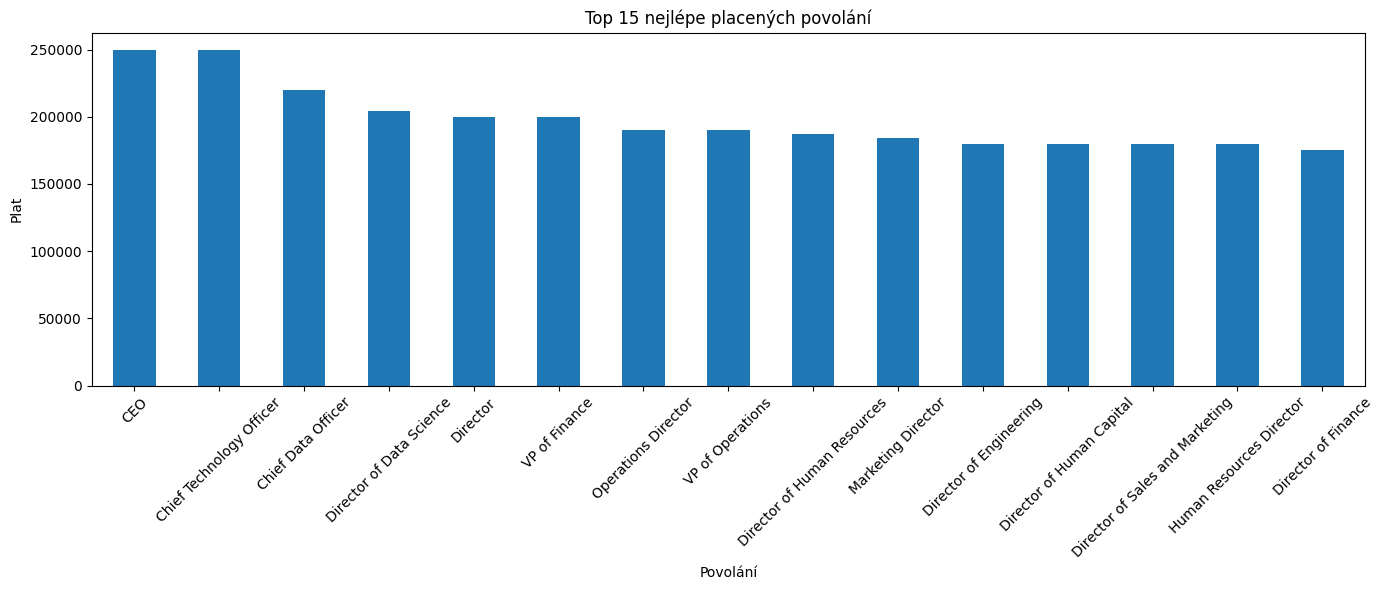

In [85]:
top_positions = data.groupby("Job Title")["Salary"].mean().nlargest(15)
plt.figure(figsize=(14, 6))
ax = top_positions.plot(kind="bar")
ax.set_ylabel("Plat")
plt.title("Top 15 nejlépe placených povolání")
plt.xlabel("Povolání")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Z grafu můžeme vyčíst, že nejvyšší platy v tomto datasetu mají CEOs. Dále je to CTO a CDO.

## Porovnání platů podle pohlaví

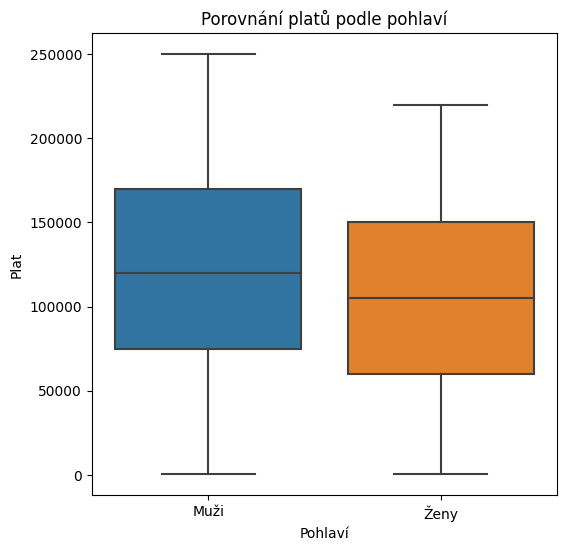

In [98]:
male_salaries = data[data["Gender"] == "Male"]["Salary"]
female_salaries = data[data["Gender"] == "Female"]["Salary"]
plt.figure(figsize=(6, 6))
sns.boxplot(x=data["Gender"], y=data["Salary"])
plt.title("Porovnání platů podle pohlaví")
plt.xlabel("Pohlaví")
plt.ylabel("Plat")
plt.xticks(ticks=[0, 1], labels=["Muži", "Ženy"])
plt.show()

Z grafu můžeme vyčíst že průměrně mají muži větší platy než ženy. Zároveň nejvyšší plat ženy je asi o 25 tisíc dolarů menší, než nejvyšší plat muže.